In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/customer_shopping_data.csv' )
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4.0,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          1
quantity          1
price             1
payment_method    1
invoice_date      1
shopping_mall     1
dtype: int64

In [ ]:
df['quantity'].fillna(0, inplace=True)

In [ ]:
df['price'].fillna(0, inplace=True)



In [ ]:
df['payment_method'].fillna(0, inplace=True)

In [ ]:
df['invoice_date'].fillna(0, inplace=True)

In [ ]:
df['gender'].fillna(0,inplace=True)
df['age'].fillna(0,inplace=True)
df['category'].fillna(0,inplace=True)


In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     1
dtype: int64

In [ ]:
age_bins=[0,18,25,35,45,float('inf')]
age_labels=['<18','18-25','26-35','36-45','46+']
df['AgeGroup']=pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
print(df[['age','AgeGroup']])

       age AgeGroup
0       28    26-35
1       21    18-25
2       20    18-25
3       66      46+
4       53      46+
...    ...      ...
55285   31    26-35
55286   45      46+
55287   26    26-35
55288   50      46+
55289    3      <18

[55290 rows x 2 columns]


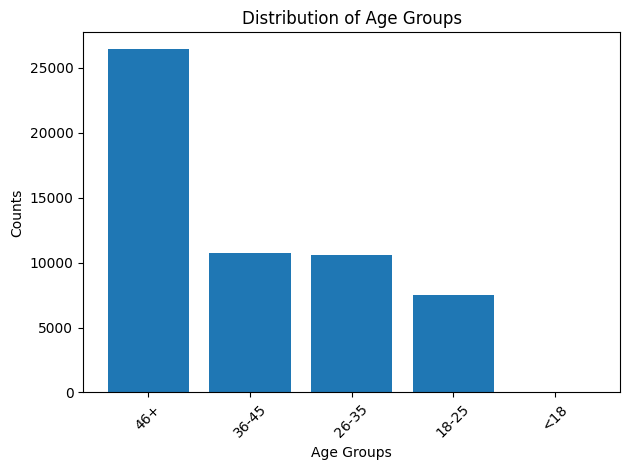

In [ ]:
age_group_counts = df['AgeGroup'].value_counts()
# Create a bar plot using Matplotlib
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=["gender", "category"])

print(df_encoded)


      invoice_no customer_id  age  quantity    price payment_method  \
0        I138884     C241288   28       5.0  1500.40    Credit Card   
1        I317333     C111565   21       3.0  1800.51     Debit Card   
2        I127801     C266599   20       1.0   300.08           Cash   
3        I173702     C988172   66       5.0  3000.85    Credit Card   
4        I337046     C189076   53       4.0    60.60           Cash   
...          ...         ...  ...       ...      ...            ...   
55285    I296084     C185930   31       3.0   900.24     Debit Card   
55286    I181399     C580659   45       1.0    40.66           Cash   
55287    I322238     C289135   26       2.0    23.46           Cash   
55288    I731999     C255353   50       3.0   121.98    Credit Card   
55289    I152128     C232697    3       0.0     0.00              0   

      invoice_date      shopping_mall AgeGroup  gender_Female  gender_Male  \
0         5/8/2022             Kanyon    26-35              1        

In [ ]:
age = df['age']
category_columns = df[['quantity']]

# Calculate the covariance matrix
covariance_matrix = np.cov(age, category_columns, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[2.25285001e+02 7.89208182e-02]
 [7.89208182e-02 2.00150734e+00]]


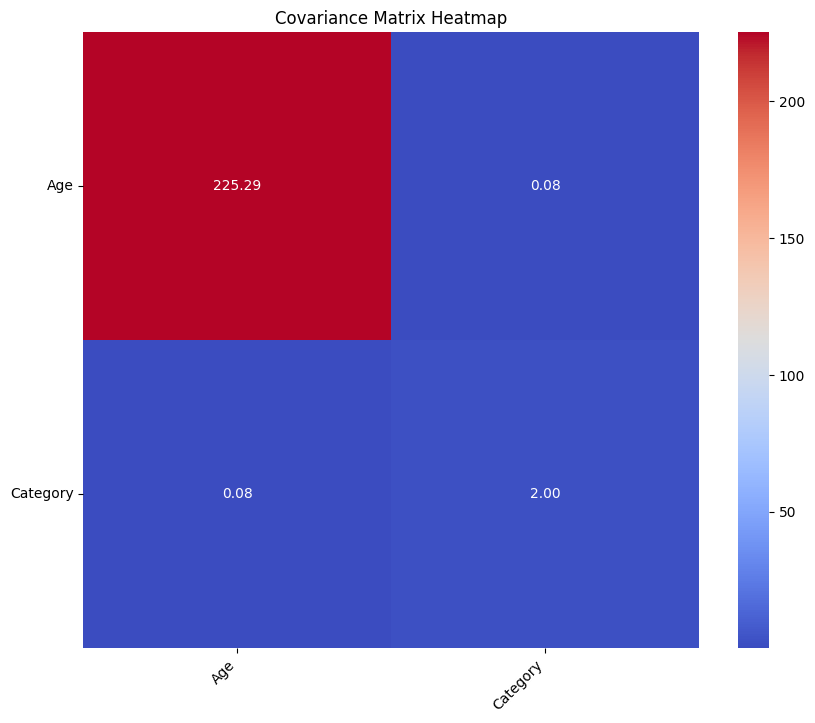

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = ['Age', 'Category']  # Replace with actual feature names

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Set x and y axis labels
heatmap.set_xticklabels(feature_names, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names, rotation=0)

plt.title("Covariance Matrix Heatmap")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['category'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Expected-value:",expected)

Chi-Square Statistic: 10.601303011621098
P-value: 0.22532888448749724
Expected-value: [[5.98336046e-01 1.65320250e+03 1.14336035e+04 5.03200615e+03
  4.93806739e+03 3.34469850e+03 1.66516922e+03 1.66157920e+03
  3.35307520e+03]
 [4.01663954e-01 1.10979750e+03 7.67539649e+03 3.37799385e+03
  3.31493261e+03 2.24530150e+03 1.11783078e+03 1.11542080e+03
  2.25092480e+03]]


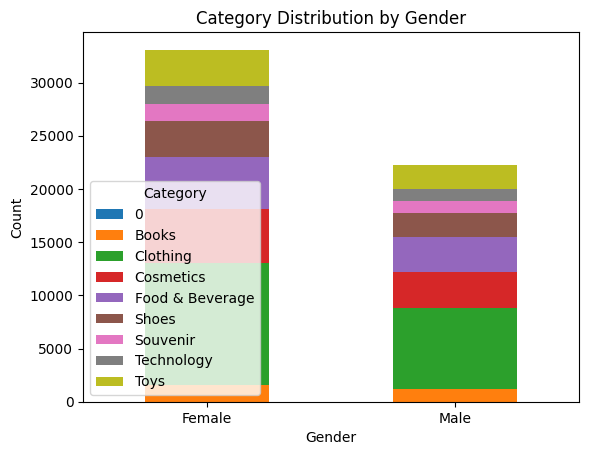

Chi-Square Statistic: 10.601303011621098
p-value: 0.22532888448749724


In [ ]:
# Plot the data
contingency_table.plot(kind="bar", stacked=True)
plt.title("Category Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()

print("Chi-Square Statistic:",chi2_stat)
print("p-value:", p_val)

In [ ]:
from scipy.stats import ttest_ind
male_data = df[df["gender"] == "Male"]["price"]
female_data = df[df["gender"] == "Female"]["price"]

# Perform independent t-test
t_statistic, p_value = ttest_ind(male_data, female_data)

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")

T-Statistic: 0.9779072721554547
p-value: 0.32812446690263686
Fail to reject null hypothesis: The means are not significantly different.


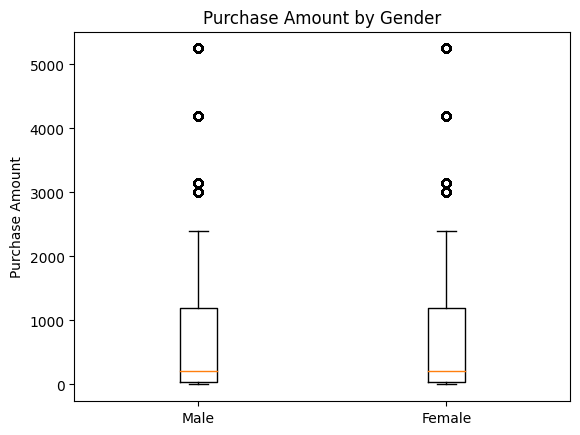

T-Statistic: 0.9779072721554547
p-value: 0.32812446690263686
Fail to reject null hypothesis: The means are not significantly different.


In [ ]:
# Create a box plot
plt.boxplot([male_data, female_data], labels=["Male", "Female"])
plt.title("Purchase Amount by Gender")
plt.ylabel("Purchase Amount")
plt.show()

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")